# PENARIKAN DATASET DARI KAGGLE

In [222]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"lizapuspitap","key":"7ee4ba5c51f7ab77c0ec326131979699"}'}

In [223]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [224]:
!kaggle datasets download -d hellbuoy/online-retail-customer-clustering

online-retail-customer-clustering.zip: Skipping, found more recently modified local copy (use --force to force download)


In [225]:
!mkdir online-retail-customer-clustering
!unzip online-retail-customer-clustering.zip -d online-retail-customer-clustering
!ls online-retail-customer-clustering

mkdir: cannot create directory ‘online-retail-customer-clustering’: File exists
Archive:  online-retail-customer-clustering.zip
replace online-retail-customer-clustering/OnlineRetail.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: online-retail-customer-clustering/OnlineRetail.csv  
OnlineRetail.csv


# BUSSINESS UNDERSTANDING

# DATA UNDERSTANDING

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [227]:
df = pd.read_csv('/content/online-retail-customer-clustering/OnlineRetail.csv', encoding='latin1')

In [228]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [230]:
df.shape

(541909, 8)

In [231]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [232]:
df.duplicated().sum()

5268

# DATA PREPARATION

In [233]:
df = df.dropna()

In [234]:
df = df.drop_duplicates()

In [235]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [236]:
df.duplicated().sum()

0

In [237]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [238]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.6+ MB


In [240]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [241]:
# kolom baru total spent customer
df['Amount']= df['Quantity'] * df['UnitPrice']

amount = df['Amount'].groupby(df['CustomerID']).sum()
amount = pd.DataFrame(amount).reset_index()
amount.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [242]:
# kolom baru total invoce
Freq = df['InvoiceNo'].groupby(df['CustomerID']).count()
Freq = pd.DataFrame(Freq).reset_index()
Freq.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [243]:
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [244]:
min_date = min(df['InvoiceDate'])
min_date

Timestamp('2010-12-01 08:26:00')

In [245]:
# kolom baru perbedaan transaksi terakhir dari tanggal invoice dengan max date
df['diff_date'] = max_date - df['InvoiceDate']
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00


In [246]:
# Hitung tanggal transaksi terakhir
# Untuk mendapatkan informasi terbaru dari pelanggan

last_trans = df.groupby('CustomerID')['diff_date'].min()
last_trans = last_trans.reset_index()
last_trans.head()

,CustomerID,diff_date
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [247]:
# convert jadi days
last_trans['diff_date'] = last_trans['diff_date'].dt.days
last_trans.head()

,CustomerID,diff_date
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [248]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00


In [249]:
# merge kolom baru menjadi dataframe baru

df1 = pd.merge(amount, Freq, on='CustomerID', how='inner')
df1.columns = ['CustomerID', 'Amount', 'Frequency']
df1.head(3)

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31


In [250]:
# merge kolom baru menjadi dataframe baru
# ID Pelanggan, Total Belanja, Frekuensi Belanja, Berapa hari terakhir belanja

df2 = pd.merge(df1, last_trans, on='CustomerID', how='inner')
df2.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
df2.head(3)

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74


Text(0.5, 0, 'Attributes')

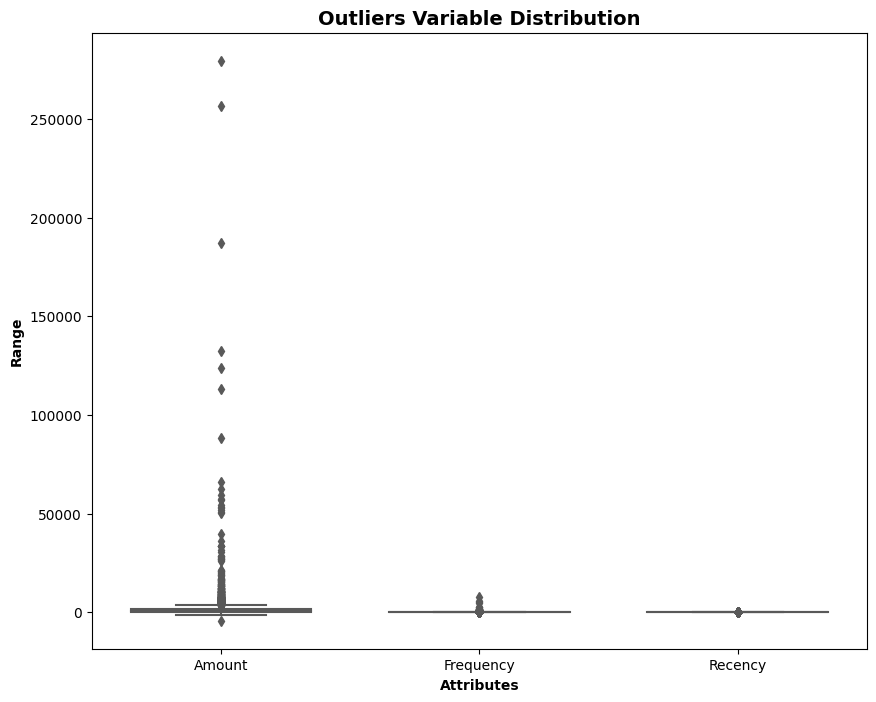

In [251]:
# cek outlier

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df2[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

Terdapat banyak outliers di atribut Amount dan beberapa outliers di atribut lainnya seperti Frequency dan Recency

In [252]:
# Menghapus (statistical) outliers untuk atribut Amount
Q1 = df2.Amount.quantile(0.05)
Q3 = df2.Amount.quantile(0.95)
IQR = Q3 - Q1
df2 = df2[(df2.Amount >= Q1 - 1.5*IQR) & (df2.Amount <= Q3 + 1.5*IQR)]

# Menghapus (statistical) outliers untuk atribut Recency
Q1 = df2.Recency.quantile(0.05)
Q3 = df2.Recency.quantile(0.95)
IQR = Q3 - Q1
df2 = df2[(df2.Recency >= Q1 - 1.5*IQR) & (df2.Recency <= Q3 + 1.5*IQR)]

# Menghapus (statistical) outliers untuk atribut Frequency
Q1 = df2.Frequency.quantile(0.05)
Q3 = df2.Frequency.quantile(0.95)
IQR = Q3 - Q1
df2 = df2[(df2.Frequency >= Q1 - 1.5*IQR) & (df2.Frequency <= Q3 + 1.5*IQR)]

In [253]:
# Scaling Atribut
from sklearn.preprocessing import StandardScaler

df3 = df2[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(df3)
df_scaled.shape

(4295, 3)

In [254]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['Amount', 'Frequency', 'Recency']
df_scaled.head()

,Amount,Frequency,Recency
0,-0.722542,-0.750830,2.302166
1,1.735232,1.057112,-0.906150
2,0.302333,-0.459551,-0.183289
3,0.279700,-0.037698,-0.737813
4,-0.531850,-0.600168,2.143731


# MODELING

In [255]:
X = df_scaled

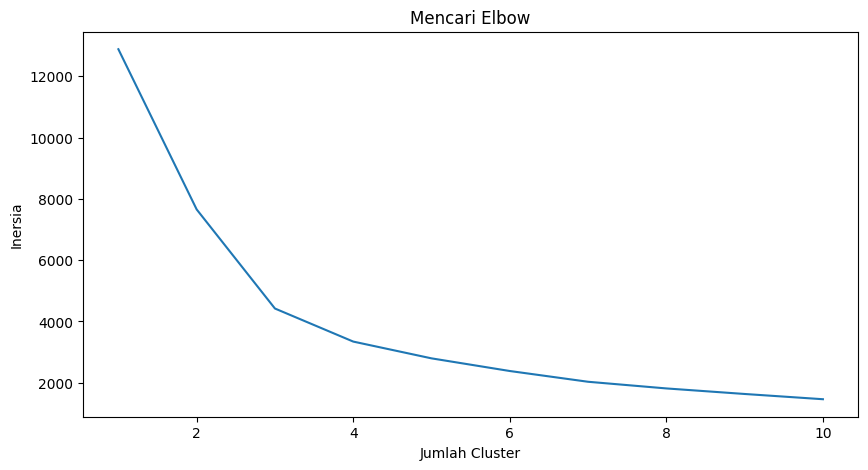

In [256]:
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init=10).fit(X)
    clusters.append(km.inertia_)

# Membuat plot inersia versus jumlah klaster
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Mencari Elbow')
ax.set_xlabel('Jumlah Cluster')
ax.set_ylabel('Inersia')

plt.show()

Cluster optimal ada di range 2-4

# EVALUATION

In [286]:
n_clust = 3
kmean = KMeans(n_clusters=n_clust, n_init=10).fit(X)
df2['Labels'] = kmean.labels_

<Axes: xlabel='Amount', ylabel='Recency'>

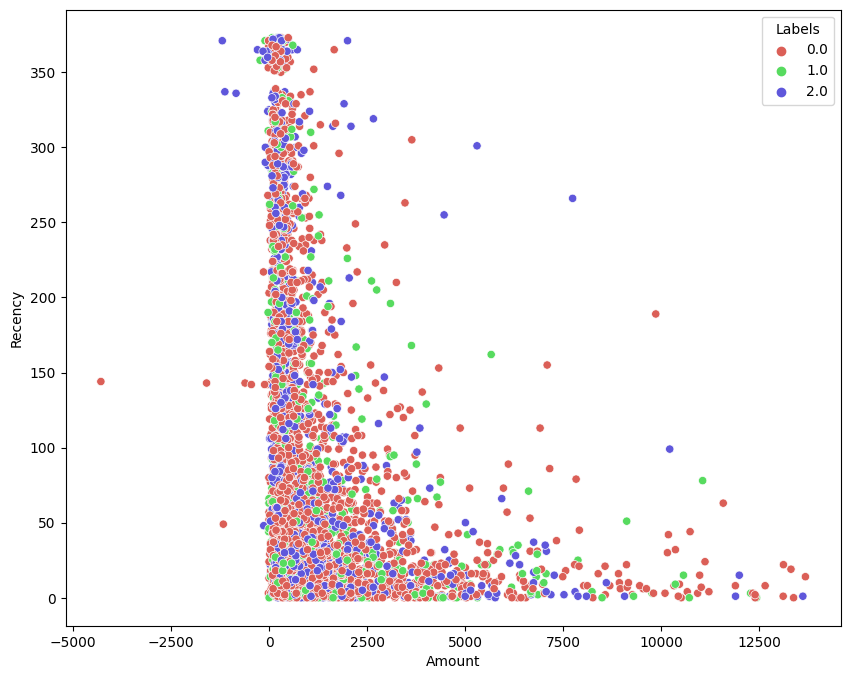

In [287]:
sns.scatterplot(x=df2['Amount'], y=df2['Recency'], hue=X['Labels'], palette=sns.color_palette('hls', n_colors=n_clust))

<Axes: xlabel='Amount', ylabel='Frequency'>

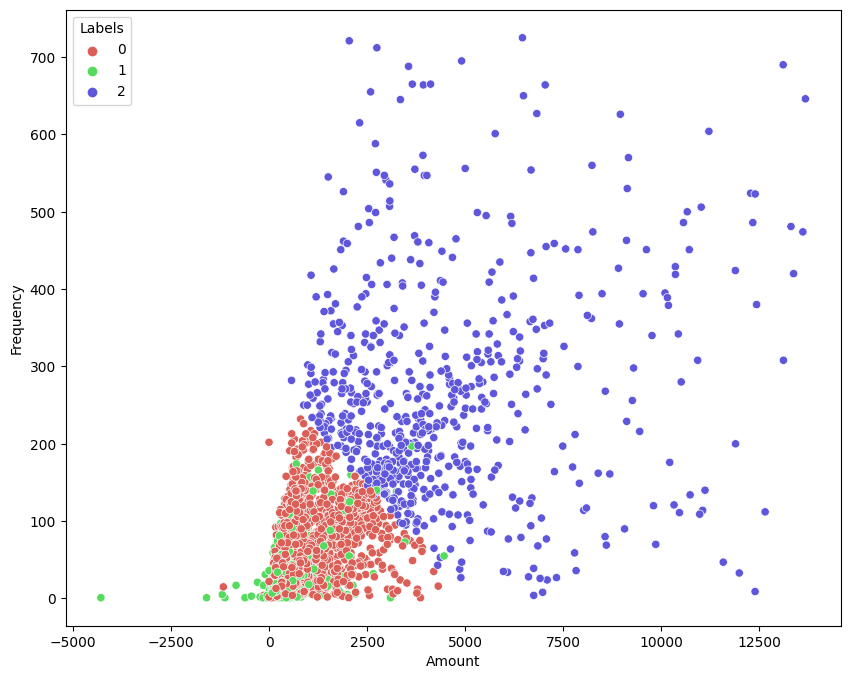

In [288]:
sns.scatterplot(x=df2['Amount'], y=df2['Frequency'], hue=df2['Labels'], palette=sns.color_palette('hls', n_colors=n_clust))

<Axes: xlabel='Frequency', ylabel='Recency'>

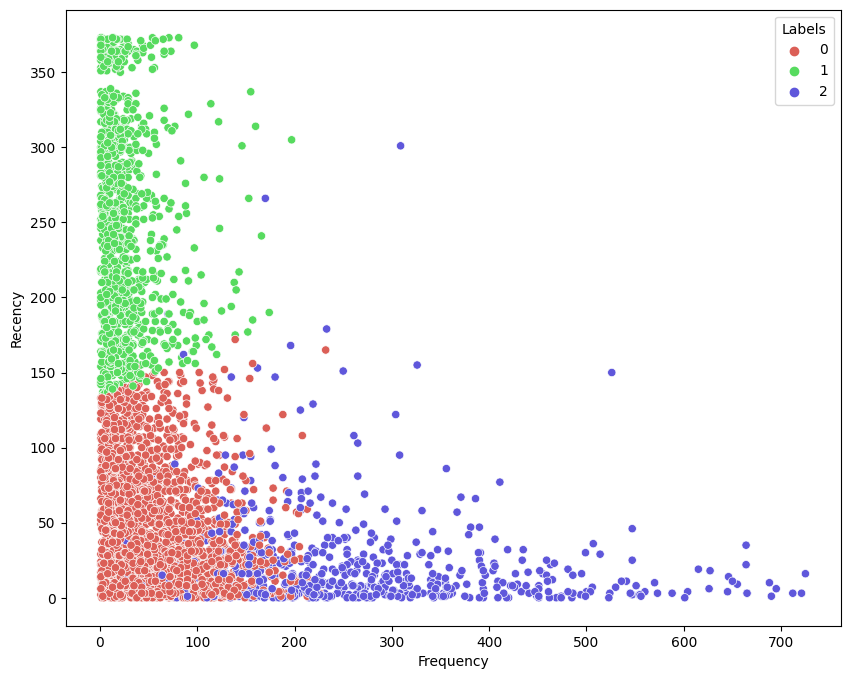

In [289]:
sns.scatterplot(x=df2['Frequency'], y=df2['Recency'], hue=df2['Labels'], palette=sns.color_palette('hls', n_colors=n_clust))

<Axes: xlabel='Amount', ylabel='Frequency'>

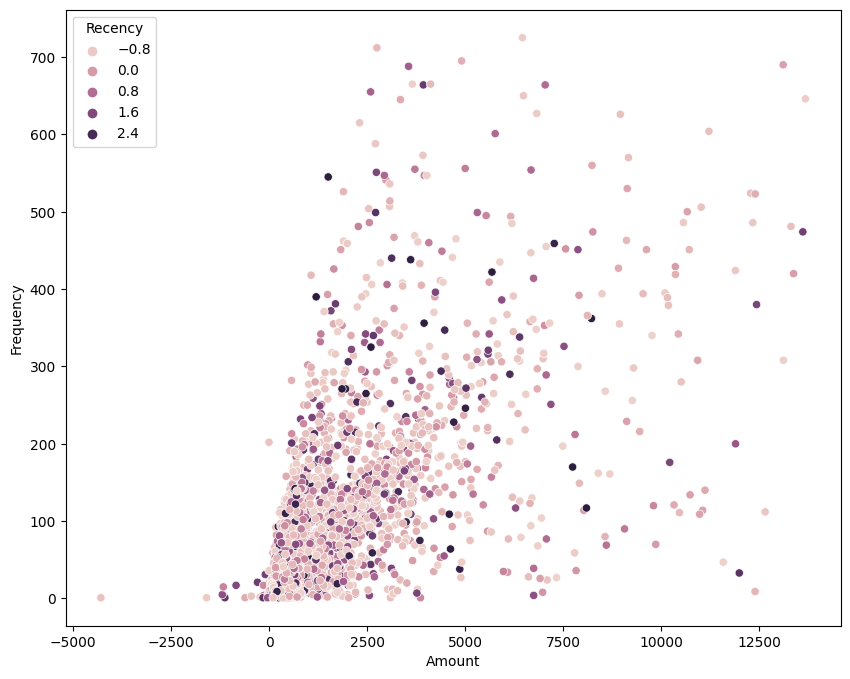

In [290]:
sns.scatterplot(x=df2['Amount'] ,y=df2['Frequency'], hue = X['Recency'])

# SAVE MODEL

In [291]:
df2.to_excel('output_cluster.xlsx')

In [292]:
df2.head()

,CustomerID,Amount,Frequency,Recency,Labels
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


In [294]:
files = df2.drop(['Labels'], axis=1)

In [295]:
files.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [297]:
files.to_excel('dataset_processed.xlsx')